In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import datetime

import sys
sys.path.insert(1, '../src/')

from SEIR_exams import *
from SEIR import *

In [2]:
df = pd.read_csv ("../data/COVID_Chile_Regiones.csv")
df = df.dropna(subset = ["Region"])
df["Fecha_dt"] = pd.to_datetime (df["Fecha"])
df["Fecha_dt"][df["Fecha_dt"] >= '2020-03-18'] -=  pd.Timedelta(hours=12)

df = df[(df["Region"] == "Ñuble") & (df["Contagiados"] > 0)]
i_data = df["Contagiados"].values
df = df[(df["Region"] == "Ñuble") & (df["Contagiados"] > 50)]


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


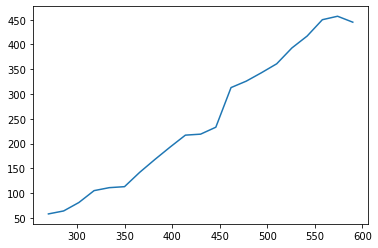

In [3]:
data_minsal = df.Infectados_Actuales.values
plt.plot(df.Infectados_Actuales)

In [117]:
df = pd.read_excel("../data/Ñuble.xls")
df["Fecha_dt"] = pd.to_datetime (df["Fecha"])

df = df[df.Contagiados > 50]

In [118]:
df

,Unnamed: 0,Region,Contagiados,Muertes,Recuperados,Infectados_Actuales,Fecha,Fecha_dt
8,9,Ñuble,57,0,0,57,3/20/2020,2020-03-20
9,10,Ñuble,66,0,0,66,3/21/2020,2020-03-21
10,11,Ñuble,93,0,0,93,3/22/2020,2020-03-22
11,12,Ñuble,107,0,0,107,3/23/2020,2020-03-23
12,13,Ñuble,112,0,0,112,3/24/2020,2020-03-24
13,14,Ñuble,120,0,0,120,3/25/2020,2020-03-25
14,15,Ñuble,150,0,1,149,3/26/2020,2020-03-26
15,16,Ñuble,184,0,3,181,3/27/2020,2020-03-27
16,17,Ñuble,199,0,4,195,3/28/2020,2020-03-28
17,18,Ñuble,232,0,10,222,3/29/2020,2020-03-29


In [119]:
df_pre_cuar = df[df["Fecha_dt"] <= '2020-04-06']
df_post_cuar = df[df["Fecha_dt"] >= '2020-04-06']

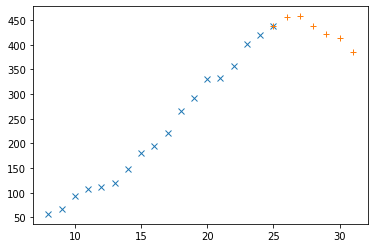

In [120]:
plt.plot(df_pre_cuar.Infectados_Actuales, "x")
plt.plot(df_post_cuar.Infectados_Actuales, "+")

In [121]:
df_post_cuar

,Unnamed: 0,Region,Contagiados,Muertes,Recuperados,Infectados_Actuales,Fecha,Fecha_dt
25,26,Ñuble,545,4,103,438,4/6/2020,2020-04-06
26,27,Ñuble,568,5,107,456,4/7/2020,2020-04-07
27,28,Ñuble,578,5,115,458,4/8/2020,2020-04-08
28,29,Ñuble,588,6,144,438,4/9/2020,2020-04-09
29,30,Ñuble,606,6,178,422,2020-04-10 00:00:00,2020-04-10
30,31,Ñuble,613,7,192,414,2020-04-11 00:00:00,2020-04-11
31,32,Ñuble,618,7,225,386,2020-04-12 00:00:00,2020-04-12


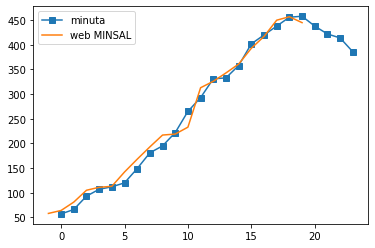

In [122]:
plt.plot(np.arange(len(df.Infectados_Actuales)), df["Infectados_Actuales"], label = "minuta", marker = "s")
plt.plot(np.arange(len(data_minsal))-1, data_minsal, label = "web MINSAL")
plt.legend()


In [123]:
a = 0.45
k = 0.2
a_date = 19.3
ts = np.arange (0, 100, 1)

alphas = 1 + (a-1)/(1+np.exp(-k*(ts-a_date)))


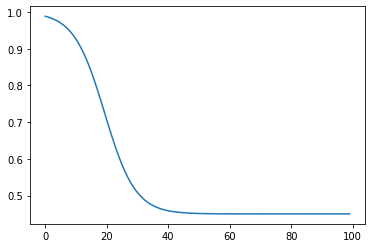

In [124]:
plt.plot (alphas)

In [125]:
beta = 1e-07
sigma = 1/14.5 
gamma = 1./12.0

In [126]:
N_adj = 3
t_all_data = np.arange(len(df.Infectados_Actuales))
t_data = np.arange(len(df_pre_cuar.Infectados_Actuales))
C_real = df_pre_cuar.Contagiados.values
I_real = df_pre_cuar.Infectados_Actuales.values
R_real = df_pre_cuar.Recuperados.values + df_pre_cuar.Muertes.values

t_data_rea = np.arange(len(df_post_cuar.Infectados_Actuales)) + len(t_data) - 1
C_real_rea = df_post_cuar.Contagiados.values
I_real_rea = df_post_cuar.Infectados_Actuales.values
R_real_rea = df_post_cuar.Recuperados.values + df_post_cuar.Muertes.values


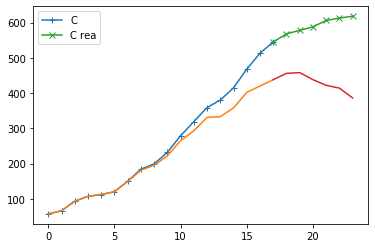

In [127]:
plt.plot(t_data, C_real, label = "C", marker = "+")
plt.plot(t_data, I_real)
plt.plot(t_data_rea, C_real_rea, label = "C rea", marker = "x")
plt.plot(t_data_rea, I_real_rea)
plt.legend()

In [15]:
df = pd.read_excel("../data/Ñuble.xls")
df["Fecha_dt"] = pd.to_datetime (df["Fecha"])

N_infec = 30

I_prev_ = np.zeros(N_infec + 1)
C_ = df.Contagiados.values
R0_ = 0

I_ =  np.zeros (len(C_) + N_infec + 1)
I_[:N_infec + 1] = I_prev_[:]
R_ = np.zeros (len(C_) + 1)
R_[0] = R0_
for i in range(len(C_)):
    dI = I_[i+1] - I_[i]
    R_[i+1] = R_[i] + dI
    I_[N_infec + i + 1] = C_[i] - R_[i] - dI
print (I_)
print (C_)
print (df.Infectados_Actuales.values)
I_ = I_[N_infec + 1:]
print (I_)



    

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   1.   3.   4.  10.  14.  26.  28.  47.  57.  66.  93.
 107. 112. 120. 150. 184. 199. 232. 279. 319. 359. 380. 415. 468. 513.
 545. 568. 578. 588. 606. 612.]
[  1   3   4  10  14  26  28  47  57  66  93 107 112 120 150 184 199 232
 279 319 359 380 415 468 513 545 568 578 588 606 613]
[  1   3   4  10  14  26  28  47  57  66  93 107 112 120 149 181 195 222
 265 293 331 333 358 402 420 438 456 458 438 422 414]
[  1.   3.   4.  10.  14.  26.  28.  47.  57.  66.  93. 107. 112. 120.
 150. 184. 199. 232. 279. 319. 359. 380. 415. 468. 513. 545. 568. 578.
 588. 606. 612.]


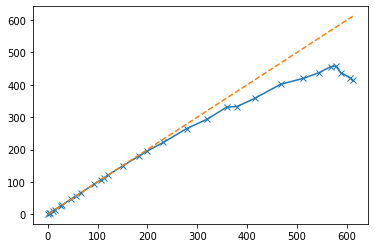

In [16]:
plt.plot (I_, df.Infectados_Actuales.values, marker = "x")
plt.plot (I_, I_, "--")



In [17]:
df = df[df.Contagiados > 50]


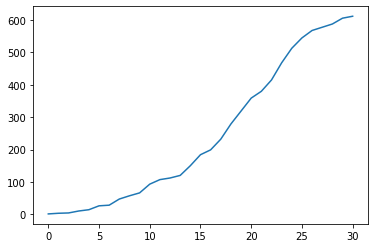

In [18]:
plt.plot(I_)

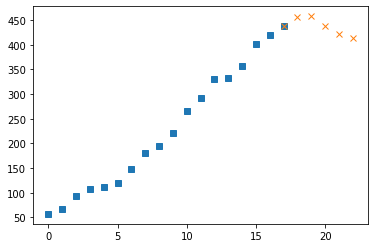

In [19]:
plt.plot(t_data, I_real, "s")
plt.plot(t_data_rea, I_real_rea, "x")

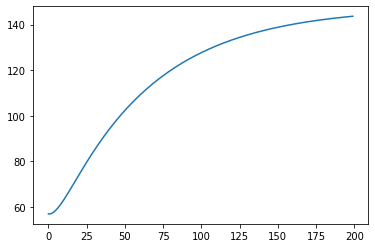

In [20]:
pop = 480609
pop = 511551
i0 = I_real[0]
e0 = 0
r0 = R_real[0]
s0 = pop - i0 - r0 - e0
c0 = C_real[0]

ts = np.arange (0, 200, 1)
s_c, e_c, i_c, r_c = SEIR_forward(ts, s0, e0, i0, r0, beta, sigma, gamma)

plt.plot (ts, i_c+r_c)


In [22]:
S_c, E_c, I_c, R_c, C_c, C_m = SEIR_exams (ts, s0, e0, i0, r0, c0, c0, beta, sigma, gamma, a_date, k, a)


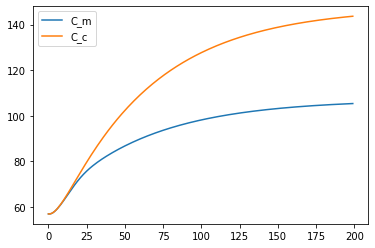

In [24]:

plt.plot (C_m, label = "C_m")
plt.plot (C_c, label = "C_c")
plt.legend()

In [26]:
RMSE, beta, sigma, gamma, a_date, k, a = GridSearchSEIR_exams (t_data, s0, e0, i0, r0, c0, c0, C_real,
                          transmission_coeff = 10**np.arange(-6.5, -5.5, .2, dtype = float), # 1 / day person
                          latency_time = np.arange(3., 10, 1.), # days
                          infectious_time = np.arange(5., 31, 1.), # days
                          ks = 10**np.linspace(-3, 2, 10),
                          a_dates = np.arange (5, 31, 5),
                          a_s = np.linspace(0.0, 1., 11))
print ("Done")

beta =  3.162277660168379e-07 35.92464995384216
  min: RMSE =  158.1488846303519 ; b, s, g =  [3.162277660168379e-07, 0.3333333333333333, 0.03333333333333333] ; a_d, k, a =  [5, 0.001, 1.0] ; ( 3.0 ,  30.0 )
beta =  5.011872336272725e-07 27.662103176116943
  min: RMSE =  65.51755678296354 ; b, s, g =  [5.011872336272725e-07, 0.3333333333333333, 0.03333333333333333] ; a_d, k, a =  [5, 0.001, 1.0] ; ( 3.0 ,  30.0 )
beta =  7.943282347242822e-07 24.2761709690094
  min: RMSE =  12.996318936896593 ; b, s, g =  [7.943282347242822e-07, 0.3333333333333333, 0.038461538461538464] ; a_d, k, a =  [10, 0.5994842503189409, 0.2] ; ( 3.0 ,  26.0 )
beta =  1.2589254117941687e-06 24.0396888256073
  min: RMSE =  11.868542911771073 ; b, s, g =  [1.2589254117941687e-06, 0.25, 0.2] ; a_d, k, a =  [10, 0.5994842503189409, 0.30000000000000004] ; ( 4.0 ,  5.0 )
beta =  1.995262314968883e-06 24.971428155899048
  min: RMSE =  11.868542911771073 ; b, s, g =  [1.2589254117941687e-06, 0.25, 0.2] ; a_d, k, a =  [10,

In [27]:
print (RMSE, beta, 1./sigma, 1./gamma, a_date, k, a)
print (np.linspace (t_data[0], t_data[-1], 5))

11.868542911771073 1.2589254117941687e-06 4.0 5.0 10 0.5994842503189409 0.30000000000000004
[ 0.    4.25  8.5  12.75 17.  ]


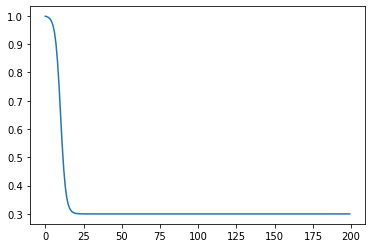

In [28]:
alphas = 1 + (a-1)/(1+np.exp(-k*(ts-a_date)))
plt.plot (alphas)

In [31]:
S_c, E_c, I_c, R_c, C_c, C_m = SEIR_exams (ts, s0, e0, i0, r0, c0, c0, beta, sigma, gamma, a_date, k, a)


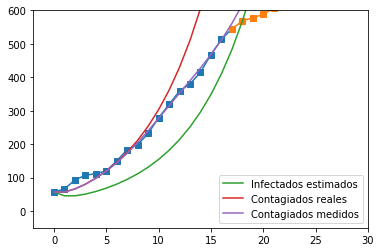

In [33]:
plt.plot(t_data, C_real, marker = "s")
plt.plot(t_data_rea, C_real_rea, marker = "s")
plt.plot(I_c, label = "Infectados estimados")
plt.plot (np.arange(len(C_c)), C_c, label = "Contagiados reales")
plt.plot (np.arange(len(C_m)), C_m, label = "Contagiados medidos")
plt.xlim((-2, 30))
plt.ylim((-50, 600))
plt.legend()


In [34]:
from scipy.optimize import curve_fit

In [36]:
def SEIR_exams_opt_func (ts, beta, sigma, gamma, a_date, k, a):
    S_c, E_c, I_c, R_c, C_c, C_m = SEIR_exams_backward (ts, s0, e0, i0, r0, c0, c0, beta, sigma, gamma, a_date, k, a)
    return C_m.flatten()
    #return np.concatenate((I_m, R_m)).flatten()


In [37]:
#popt, pcov = curve_fit(SEIR_exams_opt_func, t_data, np.concatenate((I_real, R_real)).flatten(), 
popt, pcov = curve_fit(SEIR_exams_opt_func, t_data, C_real.flatten(), 
                       p0 = [beta, sigma, gamma, a_date, k, a],
                       maxfev=5000, 
                       bounds = ([1e-10, 1./21, 1./30, t_data[0], 0, 0.], [1e-3, 1./1, 1./1., 500, 1., 1]))

In [38]:
popt

array([5.34948349e-07, 9.99936700e-01, 1.37510684e-01, 1.14025757e+01,
       1.00000000e+00, 5.61221926e-01])

In [39]:
print (beta, sigma, gamma, a_date, k, a)

1.2589254117941687e-06 0.25 0.2 10 0.5994842503189409 0.30000000000000004


In [40]:
beta_o, sigma_o, gamma_o, a_date_o, k_o, a_o = popt
print (beta_o, sigma_o, gamma_o, a_date_o, k_o, a_o)

5.349483492287936e-07 0.9999367000474253 0.13751068422896404 11.402575731937889 0.9999999999999999 0.5612219259724522


In [42]:
print (beta, 1./sigma, 1./gamma)
print (beta_o, 1./sigma_o, 1./gamma_o)

1.2589254117941687e-06 4.0 5.0
5.349483492287936e-07 1.0000633039597124 7.272162200392636


In [143]:
S_o, E_o, I_o, R_o, C_o, C_mo = SEIR_exams_backward (ts, s0, e0, i0, r0, c0, c0, beta_o, sigma_o, gamma_o, a_date_o, k_o, a_o)


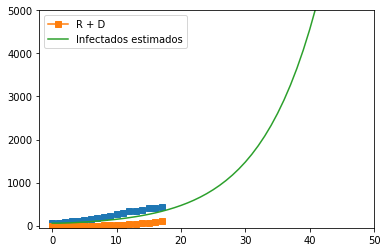

In [144]:
#plt.plot(t_all_data, df.Infectados_Actuales, marker = "s")
#plt.plot(t_all_data, df.Recuperados + df.Muertes, marker = "s", label = "R + D")
plt.plot(t_data, I_real, marker = "s")
plt.plot(t_data, R_real, marker = "s", label = "R + D")
plt.plot(I_o, label = "Infectados estimados")
#plt.plot (I_mo, label = "Infectados medidos")
#plt.plot (np.cumsum(I_mo), label = "Infectados medidos totales")
#plt.plot (R_mo, label = "Recuperados medidos")
plt.xlim((-2, 50))
plt.ylim((-50, 5000))
#plt.ylim((-50, 1e6))
plt.legend()

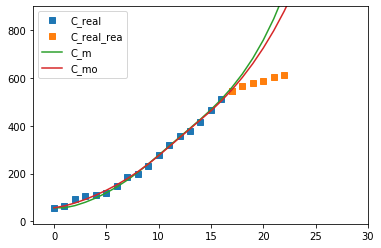

In [51]:
plt.plot(t_data, C_real, "s", label = "C_real")
plt.plot(t_data_rea, C_real_rea, "s", label = "C_real_rea")
plt.plot(ts, C_m, label = "C_m")
plt.plot(ts, C_mo, label = "C_mo")
plt.xlim ((-2, 30))
plt.ylim ((-10, 900))
plt.legend()


In [52]:
print (len(t_data))

18


0.5612219259724522


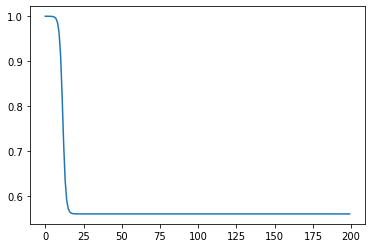

In [53]:
alphas_o = 1 + (a_o-1)/(1+np.exp(-k_o*(ts-a_date_o)))
plt.plot (alphas_o)
print(np.min(alphas_o))

In [54]:
i_ini = len(i_data) - len(I_real)
x_plot_data = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in t_data.astype(float)])

x_plot_proy = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in np.arange(len(I_o), dtype = float)])

//anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.1, 'Los datos actuales tienen varias deficiencias las cuales se traspasan a los modelos y resultados.\nEn ese sentido estos modelos están lejos de ser exactos, pero sirven para estudiar tendencias generales.\n@CabreraVives')

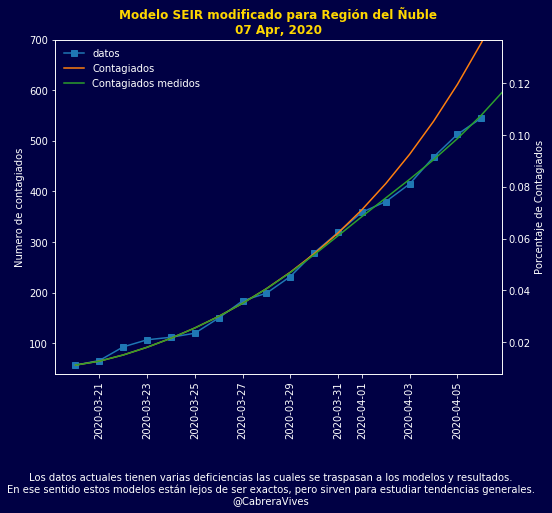

In [55]:
backg_c = "#000044"
plot_date = datetime.datetime.strptime(df["Fecha"].iloc[len(I_real)], '%m/%d/%Y').strftime('%d %b, %Y')

fig, ax1 = plt.subplots(figsize = (8, 8))

fig.patch.set_facecolor(backg_c)
fig.subplots_adjust(bottom = 0.3)

plt.plot(x_plot_data, C_real, marker = "s", label = "datos")
xlims = ax1.get_xlim()
plt.plot(x_plot_proy, C_o, label = "Contagiados")
plt.plot (x_plot_proy, C_mo, label = "Contagiados medidos")
#plt.xticks(rotation = 90)
plt.xlim(xlims)
plt.ylim((40, 700))

plt.ylabel ("Numero de contagiados", color = "white")
plt.xticks (rotation = 90, color = "white")
plt.yticks (color = "white")
plt.title ("Modelo SEIR modificado para Región del Ñuble\n" + plot_date, color = "gold", weight = "bold")

leg = plt.legend(framealpha=0)
for text in leg.get_texts():
    plt.setp(text, color = 'w')
    
ax2 = ax1.twinx ()
ax2.set_ylabel ("Porcentaje de Contagiados", color = "white")
ax2.set_ylim (np.array(ax1.get_ylim())/ pop*100)

axs = fig.axes
for ax in axs:
    ax.set_facecolor(backg_c)
    ax.tick_params(axis='x', rotation = 90)
    ax.tick_params(colors = "white")
    for sp in ax.spines:
        ax.spines[sp].set_color("white")
        
caption = "Los datos actuales tienen varias deficiencias las cuales se traspasan a los modelos y resultados.\nEn ese sentido estos modelos están lejos de ser exactos, pero sirven para estudiar tendencias generales.\n@CabreraVives"
fig.text(0.5, 0.1, caption, ha='center', va='center', color = "white")

Text(0.5, 0.1, 'Los datos actuales tienen varias deficiencias las cuales se traspasan a los modelos y resultados.\nEn ese sentido estos modelos están lejos de ser exactos, pero sirven para estudiar tendencias generales.\n@CabreraVives')

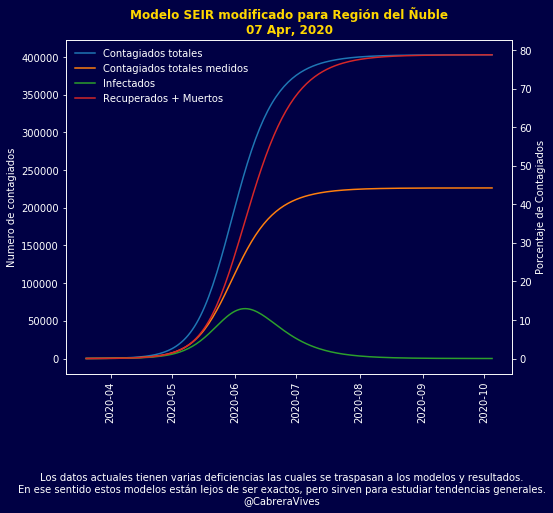

In [57]:
backg_c = "#000044"

fig, ax1 = plt.subplots(figsize = (8, 8))

fig.patch.set_facecolor(backg_c)
fig.subplots_adjust(bottom = 0.3)

#plt.plot(x_plot, df.Infectados_Actuales, marker = "s", label = "datos")
#xlims = ax1.get_xlim()
plt.plot(x_plot_proy, C_o, label = "Contagiados totales")
plt.plot (x_plot_proy, C_mo, label = "Contagiados totales medidos")
plt.plot(x_plot_proy, I_o, label = "Infectados")
#plt.plot (x_plot_proy, I_mo, label = "Infectados medidos")
plt.plot (x_plot_proy, R_o, label = "Recuperados + Muertos")
#plt.plot (x_plot_proy, R_mo, label = "Recuperados + Muertos medidos")
#plt.xticks(rotation = 90)
#plt.xlim(xlims)
#plt.ylim((0, 500))

plt.ylabel ("Numero de contagiados", color = "white")
plt.xticks (rotation = 90, color = "white")
plt.yticks (color = "white")
plt.title ("Modelo SEIR modificado para Región del Ñuble\n" + plot_date, color = "gold", weight = "bold")

leg = plt.legend(framealpha=0)
for text in leg.get_texts():
    plt.setp(text, color = 'w')
    
ax2 = ax1.twinx ()
ax2.set_ylabel ("Porcentaje de Contagiados", color = "white")
ax2.set_ylim (np.array(ax1.get_ylim())/ pop*100)

axs = fig.axes
for ax in axs:
    ax.set_facecolor(backg_c)
    ax.tick_params(axis='x', rotation = 90)
    ax.tick_params(colors = "white")
    for sp in ax.spines:
        ax.spines[sp].set_color("white")
        
caption = "Los datos actuales tienen varias deficiencias las cuales se traspasan a los modelos y resultados.\nEn ese sentido estos modelos están lejos de ser exactos, pero sirven para estudiar tendencias generales.\n@CabreraVives"
fig.text(0.5, 0.1, caption, ha='center', va='center', color = "white")

NameError: name 'x_plot' is not defined

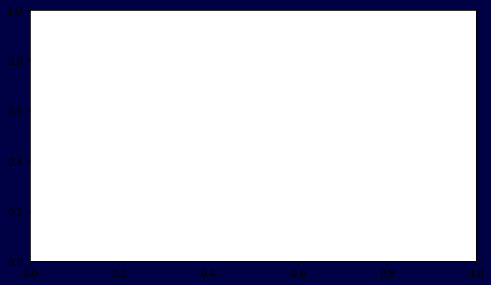

In [49]:
i0_p = i_c[-1]
s0_p = pop - i0
e0_p = e_c[-1]
r0_p = r_c[-1]
x_times_long = x_plot_proy# np.arange(x_times[0], 300, 0.5)

fig, ax1 = plt.subplots(figsize = (8,6))
fig.patch.set_facecolor(backg_c)
fig.subplots_adjust(bottom = 0.3)

#x_plot = np.array([df_c["Fecha_dt"].iloc[i_ini] + datetime.timedelta(days=i) for i in x_times_long])

#percentages = np.array()

for p in np.arange (0., 0.6, 0.1):
    s_cl_p, e_cl_p, i_cl_p, r_cl_p, i_cl_p_m, r_cl_p_m = SEIR_exams_backward(np.arange(300), s0_p, e0_p, i0_p, r0_p, 
                                                                             beta_o*(1-p), sigma_o, gamma_o, 
                                                                             a_date_o, k_o, a_o)
    print (x_plot[len(I_real):])
    print (i_cl_p)
    plt.plot (np.arange(300), i_cl_p, label = str(int(p * 100)) + "% de la población en cuarentena total.")

plt.ylabel ("Numero de contagiados", color = "white")
plt.xticks (rotation = 90, color = "white")
plt.yticks (color = "white")
plt.title ("Modelo SEIR para Región del Ñuble", color = "gold", weight = "bold")

#ax1.set_xlim((ax1.get_xlim()[0], 2* ax1.get_xlim()[1] - ax1.get_xlim()[0]))

leg = plt.legend(framealpha=0)
for text in leg.get_texts():
    plt.setp(text, color = 'w')
    
ax2 = ax1.twinx ()
ax2.set_ylabel ("Porcentaje de Contagiados", color = "white")
ax2.set_ylim (np.array(ax1.get_ylim())/ population*100)

axs = fig.axes
for ax in axs:
    ax.set_facecolor(backg_c)
    ax.tick_params(axis='x', rotation = 90)
    ax.tick_params(colors = "white")
    for sp in ax.spines:
        ax.spines[sp].set_color("white")
        
caption = "Los datos actuales tienen varias deficiencias las cuales se traspasan a los modelos y resultados.\nEn ese sentido estos modelos están lejos de ser exactos, pero sirven para estudiar tendencias generales.\n@CabreraVives"
fig.text(0.5, 0.1, caption, ha='center', va='center', color = "white")

# Reajuste

In [135]:
i0_r = I_o[len(I_real)-1]
e0_r = E_o[len(I_real)-1]
r0_r = R_o[len(I_real)-1]
c0_r = C_o[len(I_real)-1]
c0m_r = C_mo[len(I_real)-1]
s0_r = pop - i0 - r0 - e0
t_r = len(I_real)-1

def SEIR_ex_readjust_opt_func (ts, beta):
    S_c, E_c, I_c, R_c, C_c, C_m = SEIR_exams_backward (ts, s0_r, e0_r, i0_r, r0_r, c0_r, c0m_r, 
                                                        beta, sigma_o, gamma_o, a_date_o - t_r, k_o, a_o)
    return C_m.flatten()
    #return np.concatenate((I_m, R_m)).flatten()


In [136]:
print(1./sigma_o, 1./gamma_o)

1.0000633039597124 7.272162200392636


In [137]:
RMSE_r, beta_r, sigma_r, gamma_r, a_date_r, k_r, a_r = GridSearchSEIR_exams (t_data_rea, s0_r, e0_r, i0_r, r0_r, c0_r, c0m_r,
                                                                             C_real_rea, 
                          transmission_coeff = 10**np.arange(-10, -1, 1., dtype = float), # 1 / day person
#                          latency_time = np.arange(2., 15, 1.), # days
#                          infectious_time = np.arange(5., 30, 1.), # days
                          latency_time = np.array ([1./sigma_o]), # days
                          infectious_time = np.array([1./gamma_o]), # days
                          ks = np.array([k_o]),
                          a_dates = np.array ([a_date_o]),
                          a_s = np.array([a_o]))

beta =  1e-10 0.00020503997802734375
  min: RMSE =  17.27623396592058 ; b, s, g =  [1e-10, 0.9999367000474252, 0.13751068422896404] ; a_d, k, a =  [11.402575731937889, 0.9999999999999999, 0.5612219259724522] ; ( 1.0000633039597124 ,  7.272162200392636 )
beta =  1e-09 0.0001919269561767578
  min: RMSE =  17.17115656247378 ; b, s, g =  [1e-09, 0.9999367000474252, 0.13751068422896404] ; a_d, k, a =  [11.402575731937889, 0.9999999999999999, 0.5612219259724522] ; ( 1.0000633039597124 ,  7.272162200392636 )
beta =  1e-08 0.0002739429473876953
  min: RMSE =  16.260809182241832 ; b, s, g =  [1e-08, 0.9999367000474252, 0.13751068422896404] ; a_d, k, a =  [11.402575731937889, 0.9999999999999999, 0.5612219259724522] ; ( 1.0000633039597124 ,  7.272162200392636 )
beta =  1e-07 0.00028014183044433594
  min: RMSE =  16.260809182241832 ; b, s, g =  [1e-08, 0.9999367000474252, 0.13751068422896404] ; a_d, k, a =  [11.402575731937889, 0.9999999999999999, 0.5612219259724522] ; ( 1.0000633039597124 ,  7.27

In [138]:
#popt, pcov = curve_fit(SEIR_exams_opt_func, t_data, np.concatenate((I_real, R_real)).flatten(), 
#popt, pcov = curve_fit(SEIR_exams_opt_func, t_data_rea, I_real_rea.flatten(), 
popt_rea, pcov_rea = curve_fit(SEIR_ex_readjust_opt_func, t_data_rea, C_real_rea.flatten(), 
                       p0 = [beta_o],
                       maxfev=5000, 
                       bounds = ([1e-10], [1e-3]))

In [70]:
def SEIR_exams_opt_func_rea (ts, beta, sigma, gamma):
    S_c, E_c, I_c, R_c, C_c, C_m = SEIR_exams_backward (ts, s0_r, e0_r, i0_r, r0_r, c0_r, c0m_r, 
                                                   beta, sigma, gamma, a_date_o, k_o, a_o)
    return C_m.flatten()
    #return np.concatenate((I_m, R_m)).flatten()


In [71]:
popt_rea, pcov_rea = curve_fit(SEIR_exams_opt_func_rea, t_data_rea, C_real_rea.flatten(), 
                       p0 = [beta_r, sigma_r, gamma_r],
                       maxfev=5000, 
                       bounds = ([1e-10, 1./30, 1./30], [1e-3, 1./1, 1./1.]))

In [139]:
print (popt_rea, beta_o)
print (popt)
print(a_date_o, t_r)

[4.09049566e-08] 5.349483492287936e-07
[5.34948349e-07 9.99936700e-01 1.37510684e-01 1.14025757e+01
 1.00000000e+00 5.61221926e-01]
11.402575731937889 17


In [145]:
#beta_o_r, sigma_o_r, gamma_o_r = popt_rea
beta_o_r = popt_rea[0]
sigma_o_r = sigma_o
gamma_o_r = gamma_o
#a_date_r = -100
a_r = 1 + (a_o-1)/(1+np.exp(-k_o*(t_r-a_date_o)))
#a_r =0.7
print(a_r, t_r)
S_o_rea, E_o_rea, I_o_rea, R_o_rea, C_o_rea, C_mo_rea = SEIR_exams_backward (ts, s0_r, e0_r, i0_r, r0_r, c0_r, c0m_r, beta_o_r, sigma_o_r, gamma_o_r, a_date_r - t_r, k_r, a_r)


0.562842643461761 17


In [146]:
print (beta, 1./sigma, 1./gamma)
print (beta_o, 1./sigma_o, 1./gamma_o)
print (beta_r, 1./sigma_r, 1./gamma_r)
print (beta_o_r, 1./sigma_o_r, 1./gamma_o_r)


1e-07 14.5 12.0
5.349483492287936e-07 1.0000633039597124 7.272162200392636
1e-08 1.0000633039597124 7.272162200392636
4.090495660441159e-08 1.0000633039597124 7.272162200392636


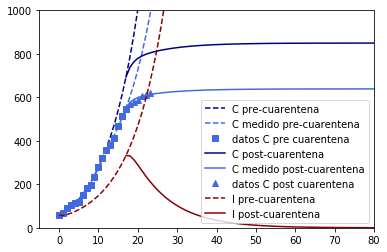

In [165]:
plt.plot(ts, C_o, label = "C pre-cuarentena", ls = "--", c = "navy")
plt.plot(ts, C_mo, label = "C medido pre-cuarentena", ls = "--", c = "royalblue")
plt.plot(t_data, C_real, "s", label = "datos C pre cuarentena", c = "royalblue")

plt.plot(ts + t_r, C_o_rea, label = "C post-cuarentena", c = "navy")
plt.plot(ts+t_r, C_mo_rea, label = "C medido post-cuarentena", c = "royalblue")
plt.plot(t_data_rea, C_real_rea, "^", label = "datos C post cuarentena", c = "royalblue")

plt.plot(ts, I_o, label = "I pre-cuarentena", ls = "--", c = "darkred")
plt.plot(ts + t_r, I_o_rea, label = "I post-cuarentena", c = "darkred")

#plt.plot(ts+t_r, C_mo_rea, label = "C medido post-cuarentena")

plt.xlim((-5, 80))
plt.ylim((0, 1000))
#plt.axvline(ts[np.argmax(I_mo_rea)] + t_r)
#plt.axhline(np.max(I_mo_rea))
plt.legend()


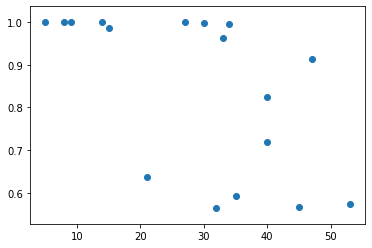

In [166]:
alphas_data = 1 + (a_r-1)/(1+np.exp(-k_r*(t_data[1:]-a_date_r)))
dC = C_real [1:] - C_real[:-1]
plt.scatter (dC, alphas_data)

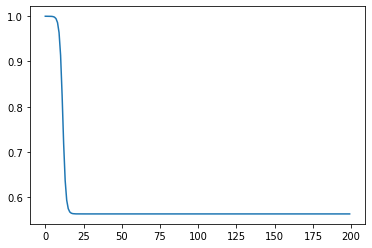

In [104]:
alphas = 1 + (a_r-1)/(1+np.exp(-k_r*(ts-a_date_r)))
plt.plot (alphas)

(-5, 30)

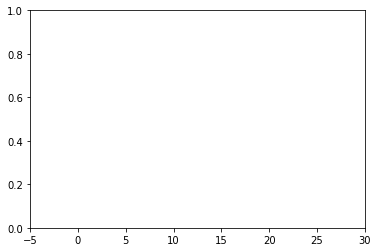

In [123]:
plt.xlim((-5, 30))


# SCRAPBOOK

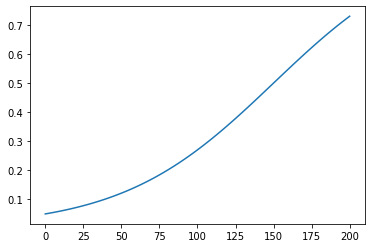

In [50]:
k = 0.02
alpha0 = 100
x = np.linspace (0, 200, 100)
y = sigmoid(x, alpha0, k, b = 0)


plt.plot(x, y)

In [3]:

#We define alpha as: 
I_alpha =i_data/i_c
#where i_data the real data and i_c is the infected evaluated by the SEIR model with respect to time (Days)
#Now we fit I_alpha as a sigmoid function



popt, pcov = curve_fit(sigmoid, x_times, I_alpha, p0, method='dogbox')
#x_times son los datos reales, las fechas
x = np.linspace(0, 30, 19)
alpha = sigmoid(x, *popt)

I = i_c/alpha
print(p0)
print("popt",popt )
plt.plot(x_times,i_data , 'o', label='data')
#alpha no se nota si se plotea con los otros plot, pero si se plotea sola se nota que es un sigmoide
#plt.plot(x,alpha,'-', label='Alpha')
plt.plot(x_times, i_c, label='SEIR')
plt.plot(x_times, I, label='Real')
plt.legend()
plt.show()

NameError: name 'i_data' is not defined

In [12]:
beta = 1e-07
sigma = 1/14.5 
gamma = 1./12.0

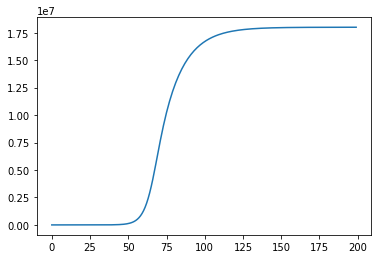

In [46]:
pop = 1.8e7
i0 = 1
e0 = 0
r0 = 0
s0 = pop - i0 - r0 - e0

ts = np.arange (0, 200, 1)
s_c, e_c, i_c, r_c = SEIR_forward(ts, s0, e0, i0, r0, beta, sigma, gamma)

plt.plot (ts, i_c+r_c)


In [183]:
alpha0 = 10000
k = 1e-4
Ex = 5000.
dI = i_c[1:] - i_c[:-1] + r_c[1:] - r_c[:-1]
alpha = (1./(1+np.exp(-(dI-alpha0)*k)))
dIe = Ex*alpha




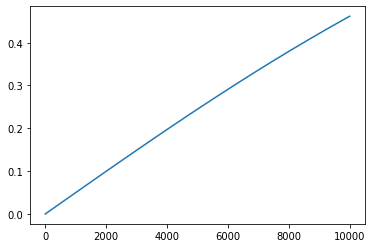

In [184]:
dIs = np.arange(0, 1e4, 10)
alphas = (1./(1+np.exp(-(dIs)*k)))*2 - 1
plt.plot(dIs, alphas)

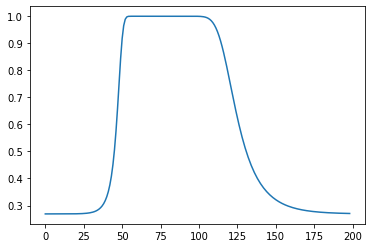

In [185]:
plt.plot(alpha)

(-100, 5100.0)

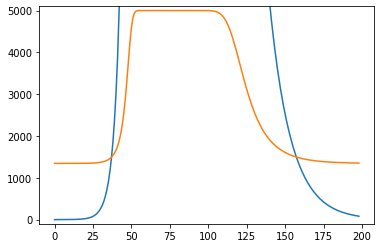

In [190]:
plt.plot(dI)
plt.plot(dIe)
#plt.yscale("log")
plt.ylim((-100, Ex + 100))
#plt.ylim((-10, 50))
#plt.xlim((0, 100))
#plt.axhline(alpha0)
#plt.axhline(alpha0/2)



In [178]:
S_c, E_c, I_c, R_c, I_m = SEIR_exams (ts, s0, e0, i0, r0, beta, sigma, gamma, alpha0, k)


(0, 500)

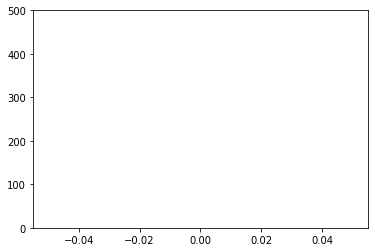

In [17]:
#plt.plot(I_c)
plt.plot(I_m, ls = "--")
plt.ylim ((0, 500))